# Proyek Analisis Data: Nama dataset
- Nama: Abd Salam At Tawa
- Email:salamabdus072@gmail.com
- Id Dicoding: abdussalam

## Menentukan Pertanyaan Bisnis

- Bagaimana tren season terhadap penyewaan sepeda ?
- Apakah tren season terhadap penyewaan sepeda bersifat statis atau dinamis setiap tahunnya?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_bs_df = pd.read_csv("data/day.csv")
day_bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_bs_df = pd.read_csv("data/hour.csv")
hour_bs_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_bs_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_bs_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_bs_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_bs_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_bs_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
# Berdasarkan hasil analisis data day dan hour 

# tidak terdapat duplicate data
# tidak terdapat missing value
# tidak terdapat inaccurate value


In [13]:
# mengubah value numerik pada kolom season menjadi string sesuai dengan definisinya
day_bs_df['season'] = day_bs_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_bs_df['yr'] = day_bs_df['yr'].map({
    0: '2011', 1: '2012'
})

In [18]:
# Mengubah nama kolom yr menjadi year
day_bs_df.rename(columns={
    'yr': 'year',
}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_bs_df.describe(include="all")

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [20]:
# Mengelempokkan penyewa sepeda berdasarkan season
day_bs_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Berdasarkan hasil diatas dapat disimpulkan bahwa season yang paling banyak orang menyewa sepeda adalah pada season fall dengan rata-rata dan jumlah terbesar diantara season lainnya, sedangkan season spring merupakan season yang paling sedikit untuk menyewa sepeda

In [34]:
# Mengelempokkan penyewa sepeda berdasarkan tahun dan season
data = day_bs_df.groupby(by=['year','season'], sort=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
data

cnt                           
              max   min         mean     sum
year season                                 
2011 Fall    6043  1115  4464.361702  419650
     Spring  3239   431  1666.666667  150000
     Summer  5805   795  3775.173913  347316
     Winter  5511   627  3664.460674  326137
2012 Fall    8714  4073  6824.244681  641479
     Spring  7836   441  3531.296703  321348
     Summer  8362  1027  6209.489130  571273
     Winter  8555    22  5791.865169  515476

In [38]:
data = data.sort_values(by = ['year', ('cnt','max')], ascending=[True,False])
print(data)

              cnt                           
              max   min         mean     sum
year season                                 
2011 Fall    6043  1115  4464.361702  419650
     Summer  5805   795  3775.173913  347316
     Winter  5511   627  3664.460674  326137
     Spring  3239   431  1666.666667  150000
2012 Fall    8714  4073  6824.244681  641479
     Winter  8555    22  5791.865169  515476
     Summer  8362  1027  6209.489130  571273
     Spring  7836   441  3531.296703  321348


Berdasarkan hasil diatas dapat disimpulkan bahwa tren season terhadap penyewaan sepeda bersifat dinamis dan statis. Tren season bersifat statis karena tren pada season fall penyewaan sepeda selalu memiliki jumlah yang terbanyak selama dua tahun berturut-turut, dan begitu juga tren penyewaan sepeda pada season spring memiliki jumlah yang paling sedikit selama dua tahun berturut-turut. Sedangkan tren season bersifat dinamis karena perbandingan penyewaan sepeda pada tren season winter dan summer berubah-ubah selama dua tahun berturut-turut

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren season terhadap penyewaan sepeda ?

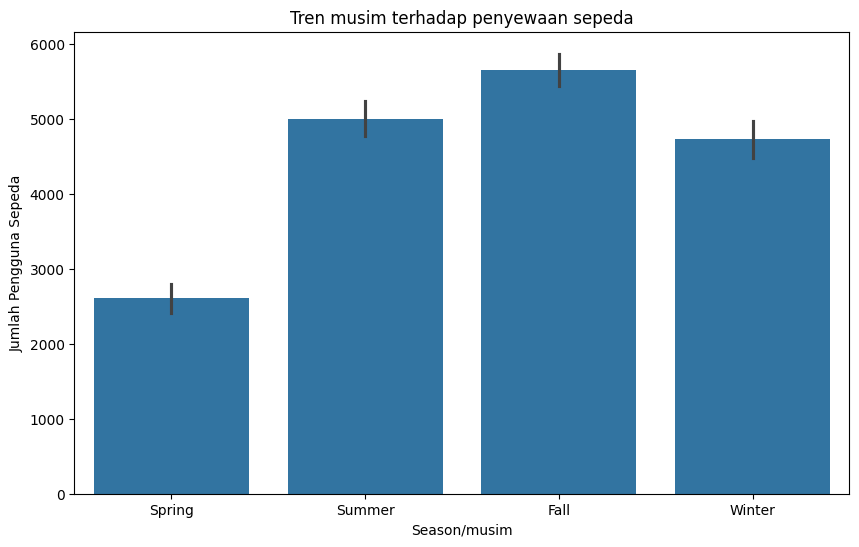

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_bs_df)

plt.title('Tren season terhadap penyewaan sepeda')
plt.xlabel('Season')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan bar chart, dapat disimpulkan bahwa tren penyewaan sepeda yang paling banyak terdapat pada season fall, kemudian diikuti season summer, winter, dam spring

### Pertanyaan 2: Apakah tren season terhadap penyewaan sepeda bersifat statis atau dinamis setiap tahunnya?

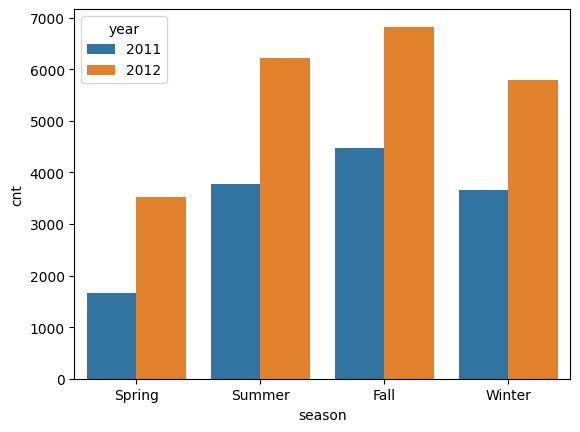

In [40]:
# penguins = sns.load_dataset("penguins")
 
sns.barplot(data=day_bs_df, x="season", y="cnt", hue="year", errorbar=None)
plt.show()

Berdasarkan hasil visualisasi diatas didapatkan bahwa season fall selalu menjadi tren penyewaan sepeda terbanyak dua tahun berturut-turut, dan season spring merupakan season yang paling sedikit jumlah penyewaan sepeda. Pada season summer dan winter memiliki urutan tren penyewaan sepeda berbeda-beda selama dua tahun berturut-turut

## Conclusion

- Conclution pertanyaan 1
Tren penyewaan sepeda yang paling banyak terjadi pada season Fall, kemudian diikuti season summer, winter, dan spring


- conclution pertanyaan 2
Tren season penyewaan sepeda bersifat statis dan dinamis setiap tahunnya. Bersifat statis karena tren penyewaan sepeda pada season fall dan spring memilik tren penyewaan sepeda yang paling banyak dan yang paling sedikit selama dua tahun terakhir. Sedangkan tren penyewaan sepeda pada season summer dan winter memiliki urutan jumlah penyewaan sepeda berubah-ubah selama dua tahun terakhir
